In [1]:
# import pandas
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [2]:
df = pd.read_csv("./data/flights_random_sample_400000.csv")

In [3]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-03-07,AA,AA,AA,311,AA,N906NN,311,13303,MIA,...,1194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-07,AA,AA,AA,332,AA,N946NN,332,12953,LGA,...,733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-07,AA,AA,AA,465,AA,N200UU,465,14107,PHX,...,304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-07,AA,AA,AA,550,AA,N947UW,550,14100,PHL,...,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-07,AA,AA,AA,591,AA,N833AW,591,11057,CLT,...,331.0,52.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,2018-03-07,UA,UA_CODESHARE,UA,6215,YV,N88335,6215,14570,RNO,...,1530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397920,2018-03-07,AA,AA_CODESHARE,AA,4441,YX,NaN,4441,14100,PHL,...,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397921,2018-03-07,AA,AA_CODESHARE,AA,4640,YX,N417YX,4640,13303,MIA,...,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397922,2018-03-07,AA,AA_CODESHARE,AA,4734,YX,N433YX,4734,14122,PIT,...,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We are using a sample of the first weak of 2018 and 2019

In [4]:
df.fl_date.value_counts().sort_index(ascending=True)

2018-01-01    434
2018-01-02    552
2018-01-03    472
2018-01-04    400
2018-01-05    510
             ... 
2019-12-27    519
2019-12-28    572
2019-12-29    599
2019-12-30    563
2019-12-31    468
Name: fl_date, Length: 730, dtype: int64

In [5]:
df = df.dropna(subset=["arr_time"])

In [6]:
df = df[df["diverted"].ne(1)]

In [7]:
df["arr_delay"].fillna(0, inplace=True)

In [8]:
df["dep_delay"].fillna(0, inplace=True)

In [9]:
df = df.dropna(subset=["air_time"])

### Create the columns 'year', 'month', 'day' separating the 'fl_date' column

In [10]:
df[["year", "month" ,"day"]] = df["fl_date"].str.split("-", expand = True)

In [11]:
df1 = df.pop('year')
df2 = df.pop('month')
df3 = df.pop('day')
df.insert(1, "year", df1)
df.insert(2, "month", df2)
df.insert(3, "day", df3)

### Now we check for all missing values and NaN values on the entire data set

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [13]:
missing_value_df

,column_name,percent_missing
fl_date,fl_date,0.000000
year,year,0.000000
month,month,0.000000
day,day,0.000000
mkt_unique_carrier,mkt_unique_carrier,0.000000
branded_code_share,branded_code_share,0.000000
mkt_carrier,mkt_carrier,0.000000
mkt_carrier_fl_num,mkt_carrier_fl_num,0.000000
op_unique_carrier,op_unique_carrier,0.000000
tail_num,tail_num,0.000000


### Drop the columns with delay values wich we are not supposed to use and also other columns with not usefull information

In [14]:
df2 = df.drop(['cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay', 
          'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1)

### Here we fill the missing values and NaN values with '0' and afterd that set an option for the notebook to show all the columns

In [15]:
df3 = df2.fillna(0)

In [16]:
pd.set_option('max_columns', None)

### Whe check for null values again and make sure we dont have any more

In [17]:
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
fl_date,fl_date,0.0
year,year,0.0
month,month,0.0
day,day,0.0
mkt_unique_carrier,mkt_unique_carrier,0.0
branded_code_share,branded_code_share,0.0
mkt_carrier,mkt_carrier,0.0
mkt_carrier_fl_num,mkt_carrier_fl_num,0.0
op_unique_carrier,op_unique_carrier,0.0
tail_num,tail_num,0.0


### Here we drop more columns and here are the reasons for each:

- origin - info available in origin_airport_id
- origin_city_name - info available in origin_airport_id
- dest - info available in dest_airport_id
- dest_city_name - info available in dest_airport_id
- tail_num - all unique ID
- mkt_carrier_fl_num - all unique ID
- op_carrier_fl_num - all unique ID
- flights - just "1" values in all rows
- dup - just "N" values in all rows
- mkt_carrier - same info in mkt_unique_carrier

In [18]:
df4 = df3.drop(['origin', 'origin_city_name', 'dest', 'dest_city_name', 'tail_num', 
                'op_carrier_fl_num', 'flights', 'dup', 'mkt_carrier', 'mkt_unique_carrier', 'mkt_carrier', 
               'branded_code_share', 'cancelled', 'diverted'], axis=1)

### Create a copy for data integrity

In [19]:
df5 = df4.copy()
df5

,fl_date,year,month,day,mkt_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
2,2018-03-07,2018,03,07,465,AA,14107,14679,835,833.0,-2.0,13.0,846.0,838.0,2.0,851,840.0,-11.0,76.0,67.0,52.0,304.0
4,2018-03-07,2018,03,07,591,AA,11057,11278,1431,1537.0,66.0,16.0,1553.0,1648.0,3.0,1559,1651.0,52.0,88.0,74.0,55.0,331.0
5,2018-03-07,2018,03,07,600,AA,11697,11057,603,557.0,-6.0,18.0,615.0,746.0,19.0,809,805.0,-4.0,126.0,128.0,91.0,632.0
6,2018-03-07,2018,03,07,1805,AA,11057,10721,1135,1129.0,-6.0,11.0,1140.0,1312.0,12.0,1352,1324.0,-28.0,137.0,115.0,92.0,728.0
7,2018-03-07,2018,03,07,2615,AA,11057,15370,1820,1812.0,-8.0,11.0,1823.0,1936.0,6.0,2002,1942.0,-20.0,162.0,150.0,133.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,2018-03-07,2018,03,07,6189,YV,11193,12264,1450,1445.0,-5.0,16.0,1501.0,1602.0,6.0,1617,1608.0,-9.0,87.0,83.0,61.0,388.0
397919,2018-03-07,2018,03,07,6215,YV,14570,12266,1245,1256.0,11.0,13.0,1309.0,1817.0,16.0,1825,1833.0,8.0,220.0,217.0,188.0,1530.0
397921,2018-03-07,2018,03,07,4640,YX,13303,10397,1607,1555.0,-12.0,16.0,1611.0,1744.0,11.0,1815,1755.0,-20.0,128.0,120.0,93.0,594.0
397922,2018-03-07,2018,03,07,4734,YX,14122,13303,1900,1855.0,-5.0,12.0,1907.0,2128.0,9.0,2154,2137.0,-17.0,174.0,162.0,141.0,1013.0


### Now we build a new variable (column 'delayed') indicating whether or not flights are delayed and use it to filter and count the number o delays per each carrier

In [20]:
df5['delayed'] = df5['arr_delay'].apply(lambda x: x > 0)

In [21]:
delayed_flights = df5[df5['delayed'] == True] #filter to only rows where delayer == True
delayed_flights['op_unique_carrier'].value_counts() #count the number of rows for each carrier

WN    24271
AA    17122
DL    13572
OO    13148
UA    11002
B6     5939
MQ     5605
OH     5139
YX     5071
AS     4469
YV     4110
9E     3573
NK     3037
EV     3012
F9     2663
QX     2087
G4     1886
PT     1837
CP     1600
ZW     1591
AX     1548
HA     1402
G7     1342
C5     1261
VX      155
EM       95
KS       43
9K       11
Name: op_unique_carrier, dtype: int64

### Now we calculate the proportion of flights that were delayed

In [22]:
df5.groupby(['op_unique_carrier','delayed']).size().unstack()

delayed,False,True
op_unique_carrier,,
9E,8650,3573
9K,34,11
AA,28745,17122
AS,8215,4469
AX,2245,1548
B6,8838,5939
C5,1344,1261
CP,3172,1600
DL,35013,13572


### Here we assign the values to a new data frame "delayed_by_carrier" and add a new 'clean' index

In [23]:
delayed_by_carrier = df5.groupby(['op_unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

delayed,op_unique_carrier,False,True
0,9E,8650,3573
1,9K,34,11
2,AA,28745,17122
3,AS,8215,4469
4,AX,2245,1548


### Calculate a new variable "flights_count" with the total delayed and not delayed flights

In [24]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,op_unique_carrier,False,True,flights_count
0,9E,8650,3573,12223
1,9K,34,11,45
2,AA,28745,17122,45867
3,AS,8215,4469,12684
4,AX,2245,1548,3793


### And now we calculate the percentage of flights delayed per each carrier and sort it by 'percentage_delayed'

In [25]:
delayed_by_carrier['percentage_delayed'] = (delayed_by_carrier[True] / delayed_by_carrier['flights_count'])*100
delayed_by_carrier.sort_values('percentage_delayed', ascending=False)

delayed,op_unique_carrier,False,True,flights_count,percentage_delayed
15,KS,28,43,71,60.563380
6,C5,1344,1261,2605,48.406910
11,F9,3601,2663,6264,42.512771
4,AX,2245,1548,3793,40.812022
5,B6,8838,5939,14777,40.190837
9,EM,150,95,245,38.775510
25,YV,6585,4110,10695,38.429173
18,OH,8439,5139,13578,37.847989
12,G4,3109,1886,4995,37.757758
10,EV,5046,3012,8058,37.379002


### One option to check the mean (general idea of how many minutes flights were delayed for each airline) its to use a pivot table with the carrier and the delay. It returns the mean of the delay for each carrier 

In [26]:
df5.pivot_table(columns='op_unique_carrier', values='arr_delay', aggfunc=np.mean)

op_unique_carrier,9E,9K,AA,AS,AX,B6,C5,CP,DL,EM,EV,F9,G4,G7,HA,KS,MQ,NK,OH,OO,PT,QX,UA,VX,WN,YV,YX,ZW
arr_delay,4.314244,-4.555556,6.070661,0.524598,15.383601,11.287,24.450288,5.760897,0.450036,4.946939,11.436833,11.664112,7.841241,9.511774,0.603905,26.422535,5.737856,6.426846,6.656282,7.367236,4.049177,2.480077,7.409361,2.774419,3.531413,10.282094,3.219832,7.302052


### Another option to check the general stats per carrier is use the .describe() function with each carrier. In this case we check for 'WN'

In [27]:
carrier_delay_stats = df5[df5['op_unique_carrier'] == 'WN']['arr_delay']

In [28]:
carrier_delay_stats.describe()

count    66502.000000
mean         3.531413
std         31.798445
min        -61.000000
25%        -12.000000
50%         -5.000000
75%          8.000000
max        484.000000
Name: arr_delay, dtype: float64

### Plot an histogram for the delay distribution of each carrier. We start for creating the bins for the X intervals. We use a 10 minutes interval (step=10), starting with 100 minutes early (start=-100) and ending at 200 minutes late (stop=200)

In [29]:
bin_values = np.arange(start=-100, stop=200, step=5)
bin_values

array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95,  100,  105,  110,  115,
        120,  125,  130,  135,  140,  145,  150,  155,  160,  165,  170,
        175,  180,  185,  190,  195])

### Here is the histogram for WN carrier 

<AxesSubplot:>

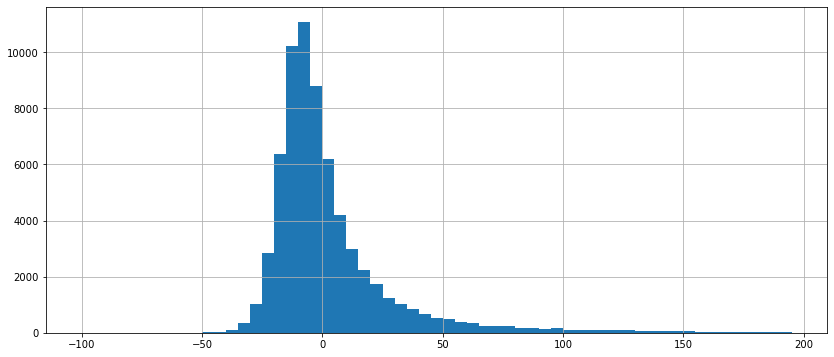

In [30]:
wn_carrier = df5[df5['op_unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

In [31]:
# y = pd.get_dummies(df5.op_unique_carrier, prefix='carrier')
# y

In [32]:
df5

,fl_date,year,month,day,mkt_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delayed
2,2018-03-07,2018,03,07,465,AA,14107,14679,835,833.0,-2.0,13.0,846.0,838.0,2.0,851,840.0,-11.0,76.0,67.0,52.0,304.0,False
4,2018-03-07,2018,03,07,591,AA,11057,11278,1431,1537.0,66.0,16.0,1553.0,1648.0,3.0,1559,1651.0,52.0,88.0,74.0,55.0,331.0,True
5,2018-03-07,2018,03,07,600,AA,11697,11057,603,557.0,-6.0,18.0,615.0,746.0,19.0,809,805.0,-4.0,126.0,128.0,91.0,632.0,False
6,2018-03-07,2018,03,07,1805,AA,11057,10721,1135,1129.0,-6.0,11.0,1140.0,1312.0,12.0,1352,1324.0,-28.0,137.0,115.0,92.0,728.0,False
7,2018-03-07,2018,03,07,2615,AA,11057,15370,1820,1812.0,-8.0,11.0,1823.0,1936.0,6.0,2002,1942.0,-20.0,162.0,150.0,133.0,842.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,2018-03-07,2018,03,07,6189,YV,11193,12264,1450,1445.0,-5.0,16.0,1501.0,1602.0,6.0,1617,1608.0,-9.0,87.0,83.0,61.0,388.0,False
397919,2018-03-07,2018,03,07,6215,YV,14570,12266,1245,1256.0,11.0,13.0,1309.0,1817.0,16.0,1825,1833.0,8.0,220.0,217.0,188.0,1530.0,True
397921,2018-03-07,2018,03,07,4640,YX,13303,10397,1607,1555.0,-12.0,16.0,1611.0,1744.0,11.0,1815,1755.0,-20.0,128.0,120.0,93.0,594.0,False
397922,2018-03-07,2018,03,07,4734,YX,14122,13303,1900,1855.0,-5.0,12.0,1907.0,2128.0,9.0,2154,2137.0,-17.0,174.0,162.0,141.0,1013.0,False


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
X = df5[['year','month','day','distance','air_time', 'origin_airport_id', 'dest_airport_id', 
         'taxi_out', 'taxi_in', 'crs_elapsed_time', 'actual_elapsed_time']]

In [56]:
y = df5['arr_delay']

In [57]:
scaler = StandardScaler() 

In [58]:
data_scaled = scaler.fit_transform(X)

In [59]:
reg = LinearRegression().fit(data_scaled, y)

In [60]:
reg.score(data_scaled, y)

0.09171106724660572

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.30, random_state=1234)

In [62]:
y_pred = reg.predict(X_test)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21.811718830701242
Mean Squared Error: 2257.312087976452
Root Mean Squared Error: 47.51117855806623


In [64]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
19563,-17.0,-5.443570
134161,0.0,17.525329
349672,-1.0,-7.487467
298505,-20.0,-9.472605
250202,-33.0,-14.269055
...,...,...
83263,-22.0,-0.941237
198019,-20.0,-10.992861
292668,-1.0,0.103690
44536,47.0,46.845716
